In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// from https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling
// disable scroll

<IPython.core.display.Javascript object>

In [40]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error as detMSE

In [45]:
def dx(alfa, x, beta, y):
    dx = alfa * x - beta * x * y
    return dx

def dy(delta, x, y, gamma):
    dy = delta * x * y - gamma * y
    return dy

def EulerSolveODE(x,y,parameters):
    for month in times:
        xList.append(x)
        yList.append(y)    
        x += dx(parameters[0], x, parameters[1], y)
        y += dy(parameters[2], x, y, parameters[3]) 

def changeParameter(parameters):
    randomNumber = np.random.random()
    if randomNumber < 1./4:
        parameters[0] = np.random.random()/10
    elif randomNumber < 2./4:
        parameters[1] = np.random.random()/10
    elif randomNumber < 3./4:
        parameters[2] = np.random.random()/10
    else:
        parameters[3] = np.random.random()/10
    return parameters

In [29]:
# import csv using pandas
pandaFile = pandas.read_csv('predator-prey-data.csv')
times = []
xValues = []
yValues = []
for row in range(len(pandaFile['t'])):
    time = pandaFile['t'][row]
    x = pandaFile['x'][row]
    y = pandaFile['y'][row]
    times.append(time)
    xValues.append(x)
    yValues.append(y)

In [49]:
# using Euler
# prey and predators are float numbers

# initial guesses
x = xValues[0] #amount of prey
y = yValues[0] #amount of predators
alfa = np.random.random()/10 #birth rate prey
beta = np.random.random()/10 #prey catch rate
delta = np.random.random()/10 #birth of predators per predator per prey
gamma = np.random.random()/10 #death rate predators
TMax = 10000
TMin = 1
temperatures = np.arange(TMax,TMin-1,-1)

establishedParameters = [alfa,beta,delta,gamma]

mse = 999999999

for T in temperatures:
    newParameters = changeParameter(establishedParameters)
    
    xList = []
    yList = []
    EulerSolveODE(x,y,newParameters)
    #determine mse once and work with that
    
    if detMSE(xValues,xList) + detMSE(yValues,yList) < mse:
        establishedParameters = newParameters
        mse = detMSE(xValues,xList) + detMSE(yValues,yList)
        
    elif ((detMSE(xValues,xList) + detMSE(yValues,yList)) - mse)/T < np.random.random():
        establishedParameters = newParameters
        mse = detMSE(xValues,xList) + detMSE(yValues,yList)  
        
print establishedParameters

[0.07936504115823365, 0.045763309891698356, 0.077698223309062, 0.024465142423023445]


In [6]:
# determine the mean squared error
print detMSE(xValues,xList) + detMSE(yValues,yList)

255441080.01873076


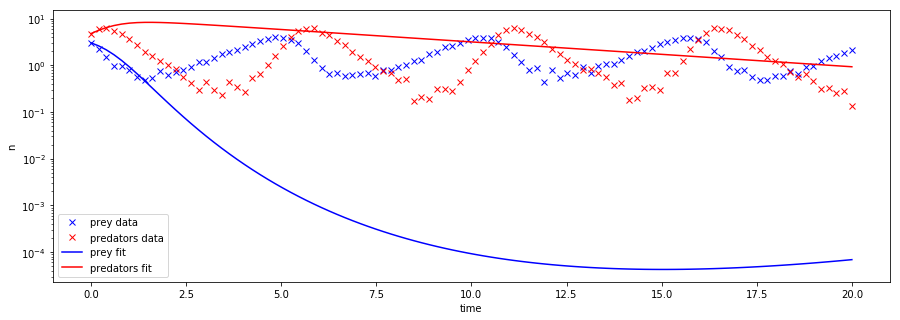

In [50]:
#print 'xList =', xList
#print 'yList =', yList
plt.figure(figsize=(15,5))
plt.plot(times,xValues,'x', label = 'prey data', color = 'b')
plt.plot(times,yValues,'x', label = 'predators data', color = 'r')
plt.plot(times,xList,label = 'prey fit', color = 'b')
plt.plot(times,yList, label = 'predators fit', color = 'r')
plt.yscale("log")
plt.xlabel('time')
plt.ylabel('n')
plt.legend()
plt.show()